##### **Projeto 4 - Vamo AI - Resilia + iFood**

_Grupo:_ 

*   Ana Luiza Soares
*   Jênnifer Stéfani
*   Ramon Brito

# Acesso dos grupos minoritários ao ensino superior através do Prouni

Neste _notebook_ apresentamos a análise exploratória realizada com dados sobre cursos e notas de corte do Prouni 2018, e com os dados abertos do Prouni dos anos de 2005 à 2018.O objetivo desse projeto é analisar o ingresso de estudantes minoritários ao ensino superior ao longo dos anos do programa, e verificar as taxas percentuais de ingresso desses grupos no ano de 2018.

Para mais informações sobre as bases de dados utilizadas, documentação desse projeto ou visualização dos dados via Tableau, acesse nosso [repositório](https://github.com/soaresana/projeto4-vamoai) no GitHub.

---------------------------

Nossa análise exploratória está estruturada da seguinte forma:



1.   **Prouni 2018 - Cursos e Nota de corte**  
  A.   Importando a base de dados  
  B.   Explorando a base de dados  
  C.   Visualização dos dados


2.   **Prouni 2005 à 2018 - Bolsas e perfil dos beneficiários**  
  A.   Tratamento da base de dados  
  B.   Explorando a base de dados  
  C.   Visualização dos dados 

3. **Referências**





### Bibliotecas

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import zipfile 
from google.colab import files

# Prouni 2018

Importando a base de dados principal, com informações dos cursos e das notas de corte do Prouni 2018. 

*   Cursos e notas de corte do Prouni 2018




In [56]:
prouni = pd.read_csv('/content/drive/MyDrive/DadosProuni/cursos-prouni.csv')

## 1.1 Tratando base de dados principal

In [57]:
prouni.columns

Index(['grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'curso_id', 'curso_busca', 'cidade_busca', 'uf_busca', 'cidade_filtro',
       'universidade_nome', 'campus_nome', 'campus_id', 'nome',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas'],
      dtype='object')

In [58]:
colunas = ['grau', 'turno', 'mensalidade', 'bolsa_integral_cotas','bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
            'cidade_busca', 'uf_busca','universidade_nome', 'campus_nome', 'nome', 'nota_integral_ampla', 'nota_integral_cotas',
           'nota_parcial_ampla', 'nota_parcial_cotas']

In [59]:
tipo_prouni ={'grau': 'category', 'turno':'category', 'mensalidade':'float64', 'bolsa_integral_cotas': 'float64','bolsa_integral_ampla':'float64',
              'bolsa_parcial_cotas':'float64', 'bolsa_parcial_ampla':'float64','cidade_busca':'category', 'uf_busca':'category','universidade_nome':'category',
              'campus_nome':'category', 'nome':'category', 'nota_integral_ampla':'float64', 'nota_integral_cotas':'float64',
           'nota_parcial_ampla':'float64', 'nota_parcial_cotas':'float64'}

In [60]:
# importando os dados com colunas e tipos selecionados
prouni = pd.read_csv('/content/drive/MyDrive/DadosProuni/cursos-prouni.csv', usecols= colunas, dtype= tipo_prouni)

In [61]:
prouni['bolsa_integral_cotas'].fillna(0, inplace=True)
prouni['bolsa_integral_ampla'].fillna(0, inplace=True)
prouni['bolsa_parcial_cotas'].fillna(0, inplace=True)
prouni['bolsa_parcial_ampla'].fillna(0, inplace=True)
prouni['nota_integral_ampla'].fillna(0, inplace=True)
prouni['nota_integral_cotas'].fillna(0, inplace=True)
prouni['nota_parcial_ampla'].fillna(0, inplace=True)
prouni['nota_parcial_cotas'].fillna(0, inplace=True)

In [62]:
prouni.insert(9, 'regiao', prouni['uf_busca'])

In [63]:
prouni['regiao'].replace(['RS','PR','SC'],'Sul', inplace=True)
prouni['regiao'].replace(['SP','MG','RJ','ES'],'Sudeste',inplace=True)
prouni['regiao'].replace(['MT','MS','GO','DF'],'Centro-Oeste',inplace=True)
prouni['regiao'].replace(['RR','AM','AC','RO','AP','TO','PA'],'Norte',inplace=True)
prouni['regiao'].replace(['BA','PE','RN','CE','AL','SE','PB','PI','MA'], 'Nordeste',inplace=True)

In [64]:
prouni['regiao'] = prouni['regiao'].astype('category')
prouni['bolsa_integral_cotas'] = prouni['bolsa_integral_cotas'].astype('int64')
prouni['bolsa_integral_ampla'] = prouni['bolsa_integral_ampla'].astype('int64')
prouni['bolsa_parcial_cotas'] = prouni['bolsa_parcial_cotas'].astype('int64')
prouni['bolsa_parcial_ampla'] = prouni['bolsa_parcial_ampla'].astype('int64')

In [65]:
prouni.rename(columns={'cidade_busca':'cidade', 'uf_busca':'UF','universidade_nome':'IES','campus_nome':'campus','nome':'curso'}, inplace=True)

In [66]:
prouni.insert(2,'modalidade',prouni['turno'] )

In [67]:
prouni['modalidade'].replace(['Curso a Distância'],'EAD', inplace=True)
prouni['modalidade'].replace(['Integral', 'Matutino', 'Noturno', 'Vespertino'],'Presencial',inplace=True) 

In [68]:
prouni['modalidade'] = prouni['modalidade'].astype('category')

In [69]:
prouni.head()

,grau,turno,modalidade,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,cidade,UF,regiao,IES,campus,curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,Presencial,9999.99,15,14,0,0,Campo Grande,MS,Centro-Oeste,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,Presencial,9836.40,1,0,0,0,Crateus,CE,Nordeste,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,Presencial,9715.61,2,5,6,10,Sao Paulo,SP,Sudeste,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,Presencial,9689.34,3,2,0,0,Crateus,CE,Nordeste,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,Presencial,9674.34,4,1,5,2,Rio Branco,AC,Norte,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,Medicina,758.32,723.94,734.92,711.26


In [70]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41447 entries, 0 to 41446
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   grau                  41447 non-null  category
 1   turno                 41447 non-null  category
 2   modalidade            41447 non-null  category
 3   mensalidade           41447 non-null  float64 
 4   bolsa_integral_cotas  41447 non-null  int64   
 5   bolsa_integral_ampla  41447 non-null  int64   
 6   bolsa_parcial_cotas   41447 non-null  int64   
 7   bolsa_parcial_ampla   41447 non-null  int64   
 8   cidade                41447 non-null  category
 9   UF                    41447 non-null  category
 10  regiao                41447 non-null  category
 11  IES                   41447 non-null  category
 12  campus                41447 non-null  category
 13  curso                 41447 non-null  category
 14  nota_integral_ampla   41447 non-null  float64 
 15  no

In [71]:
prouni.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000
mean,622.636966,1.204695,1.540618,0.398943,2.716168,451.925764,228.827957,208.094800,68.150221
std,606.442296,2.041299,2.662203,1.323131,11.057922,242.259732,279.577821,260.578954,175.113886
min,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,278.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,0.000000
50%,393.350000,1.000000,1.000000,0.000000,0.000000,562.760000,0.000000,0.000000,0.000000
75%,825.000000,2.000000,2.000000,0.000000,1.000000,604.200000,555.800000,503.570000,0.000000
max,9999.990000,58.000000,67.000000,74.000000,350.000000,781.200000,792.240000,776.360000,768.340000


In [72]:
# prouni.to_csv ('prouni.csv', index = None, header=True) 
# files.download('prouni.csv')

## 1.2 Explorando os Dados

In [73]:
prouni['grau'].value_counts(normalize=True)*100

Bacharelado     46.239776
Tecnológico     32.523464
Licenciatura    21.236760
Name: grau, dtype: float64

In [74]:
prouni['modalidade'].value_counts(normalize=True)*100

EAD           55.314015
Presencial    44.685985
Name: modalidade, dtype: float64

In [75]:
prouni['turno'].value_counts(normalize=True)*100

Curso a Distância    55.314015
Noturno              29.425531
Matutino             12.485825
Integral              1.544141
Vespertino            1.230487
Name: turno, dtype: float64

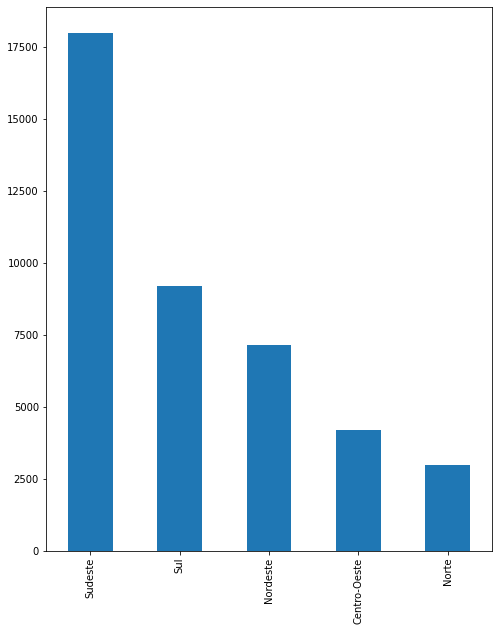

In [76]:
prouni['regiao'].value_counts().sort_values(ascending=False).plot(kind = 'bar',figsize=(8,10))

In [77]:
cursos_estados = prouni['UF']
cursos_estados.value_counts().sort_values(ascending=False).head()

SP    11533
MG     4175
PR     3918
RS     3060
BA     2505
Name: UF, dtype: int64

In [78]:
prouni.groupby('IES').agg({'IES':'count'})

,IES
IES,
Alfa - Faculdade de Almenara,4
Atopp Brasil Faculdade de Negócios - Atopp Brasil - ATOPP BRASIL,2
Centro Superior de Estudos Jurídicos Carlos Drummond de Andrade - Csejcda - CSEJCDA,2
Centro Técnico-Educacional Superior do Oeste Paranaense - Ctesop - CTESOP,6
Centro Universitario Projeção - UNIPROJEÇÃO,63
...,...
Faculdade Messianica,5
Faculdade Unyleya,21
Faculdade Waldir Filho,1


In [79]:
qtd_ies = pd.unique(prouni['IES'])
qtd_ies = pd.DataFrame(qtd_ies)
qtd_ies.count()[0]

1299

## 1.3 Visualização dos dados




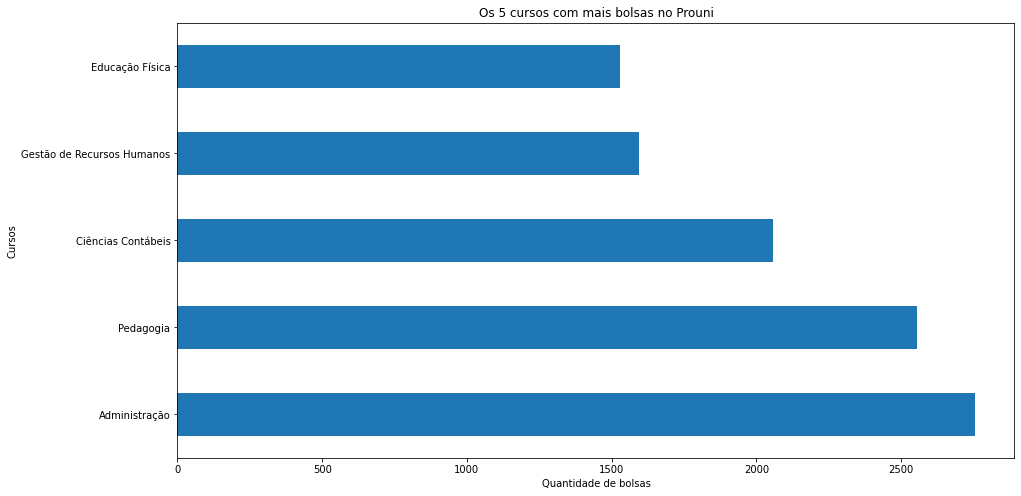

In [80]:
prouni['curso'].value_counts().head(5).plot(kind='barh',figsize =(15,8), grid= False)
plt.title('Os 5 cursos com mais bolsas no Prouni')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()

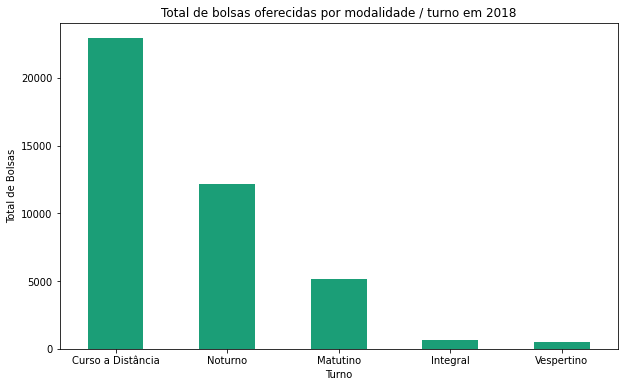

In [81]:
Turnos = prouni['turno'].value_counts().plot(kind='bar', figsize=(10,6), grid = False, rot=0, colormap='Dark2')
plt.title('Total de bolsas oferecidas por modalidade / turno em 2018')
plt.xlabel('Turno',fontsize=10)
plt.ylabel('Total de Bolsas',fontsize=10) 
plt.show()

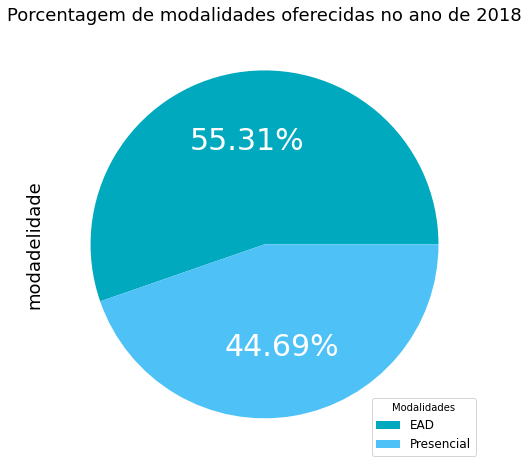

In [82]:
modalidade = prouni['modalidade'].value_counts(normalize=True)*100

c = ['#00A9BE', '#4EC2F7']
modalidade.plot(kind='pie',autopct='%0.2f%%', colors=c , textprops={'color':'white','size':'30'}, figsize = (15,8))
plt.title('Porcentagem de modalidades oferecidas no ano de 2018', fontsize=18)
plt.ylabel('modadelidade', fontsize=18)
plt.legend(fontsize=12, title='Modalidades', loc=4)

Mensalidades


In [83]:
prouni['mensalidade'].describe()

count    41447.000000
mean       622.636966
std        606.442296
min        139.000000
25%        278.000000
50%        393.350000
75%        825.000000
max       9999.990000
Name: mensalidade, dtype: float64

In [84]:
prouni.groupby(['curso'], as_index=False).agg({'mensalidade':'mean'}).sort_values(by=['mensalidade'], ascending=False).head(10)

,curso,mensalidade
209,Medicina,7168.341532
115,Engenharia de Materiais e Nanotecnologia,4108.000000
60,Desenho Industrial,3467.000000
275,Sistemas Biomédicos,3420.000000
42,Comunicação Social - Cinema,2782.333333
231,Pilotagem Profissional de Aeronaves,2630.886000
52,Comunicação e Multimeios,2585.050000
225,Odontologia,2324.165149
216,Música - Composição,2211.000000
66,Design de Games,2180.000000


In [85]:
prouni.groupby(['curso']).agg({'mensalidade':'max'}).sort_values(by=['mensalidade'], ascending=False).head(10)

,mensalidade
curso,
Medicina,9999.99
Enfermagem,9836.40
Psicologia,9689.34
Engenharia de Computação,8695.43
Educação Física,8466.72
Direito,7717.82
Engenharia de Produção,7360.35
Fisioterapia,6903.90
Administração,6552.52


In [86]:
prouni.groupby(['curso']).agg({'mensalidade':'min'}).sort_values(by=['mensalidade'], ascending=True).head(10)

,mensalidade
curso,
Gestão Ambiental,139.0
Serviço Social,139.0
Gestão de Recursos Humanos,139.0
Marketing,144.0
Sociologia,149.0
Gestão Comercial,149.0
Segurança no Trabalho,159.0
Negócios Imobiliários,159.0
Administração,169.0


Cursos com maiores notas de corte por modalidade da bolsa

In [87]:
# Cursos com maiores notas de corte (bolsa integral ampla)
cursos_bi_ampla = prouni.groupby('curso', as_index = False).agg({'nota_integral_ampla':'max'}).sort_values(by=['nota_integral_ampla'], ascending=False).reset_index()
cursos_bi_ampla.drop(columns ='index', inplace=True)
cursos_bi_ampla.head()

,curso,nota_integral_ampla
0,Medicina,781.20
1,Direito,771.66
2,Biomedicina,763.66
3,Arquitetura e Urbanismo,753.90
4,Odontologia,753.66


In [88]:
# Cursos com maiores notas de corte (bolsa integral cota)
cursos_bi_cota = prouni.groupby('curso', as_index = False).agg({'nota_integral_cotas':'max'}).sort_values(by=['nota_integral_cotas'], ascending=False).reset_index()
cursos_bi_cota.drop(columns ='index', inplace=True)
cursos_bi_cota.head()

,curso,nota_integral_cotas
0,Medicina,792.24
1,Engenharia Elétrica,775.34
2,Engenharia Civil,750.26
3,Radiologia,737.84
4,Relações Públicas,733.98


In [90]:
# Cursos com maiores notas de corte (bolsa parcial ampla)
cursos_bp_ampla = prouni.groupby('curso', as_index = False).agg({'nota_parcial_ampla':'max'}).sort_values(by=['nota_parcial_ampla'], ascending=False).reset_index()
cursos_bp_ampla.drop(columns ='index', inplace=True)
cursos_bp_ampla.head()

,curso,nota_parcial_ampla
0,Medicina,776.36
1,Engenharia de Produção,755.04
2,Direito,736.12
3,Enfermagem,725.50
4,Física,724.08


In [ ]:
# Cursos com maiores notas de corte (bolsa parcial ampla)
cursos_bp_cota = prouni.groupby('curso', as_index = False).agg({'nota_parcial_cotas':'max'}).sort_values(by=['nota_parcial_cotas'], ascending=False).reset_index()
cursos_bp_cota.drop(columns ='index', inplace=True)
cursos_bp_cota.head()

Cursos com menores notas de corte por modalidade (acima de 450)

In [92]:
#Cursos com menores notas de corte (bolsa integral ampla)
menores_notas_integral_ampla = ( prouni.groupby('curso').agg({'nota_integral_ampla':'min'})
                  .sort_values(by=['nota_integral_ampla'], ascending=True)
                  .query('nota_integral_ampla > 450').head()).reset_index()
menores_notas_integral_ampla

,curso,nota_integral_ampla
0,Gerenciamento de Redes de Computadores,462.06
1,Serviços Jurídicos e Notariais,466.70
2,Eletrônica Industrial,480.44
3,Biologia,483.52
4,Comunicação para Web,491.80


In [93]:
#Cursos com menores notas de corte (bolsa integral cota)
menores_notas_integral_cota = ( prouni.groupby('curso').agg({'nota_integral_cotas':'min'})
                  .sort_values(by=['nota_integral_cotas'], ascending=True)
                  .query('nota_integral_cotas > 450').head()).reset_index()
                
menores_notas_integral_cota

,curso,nota_integral_cotas
0,Engenharia Industrial Mecânica,479.92
1,Serviços Jurídicos,482.06
2,Podologia,499.30
3,Tecnologia em Engenharia,500.42
4,Letras - Português e Espanhol e Respectivas Li...,503.54


In [94]:
# Cursos com menores notas de corte (bolsa parcial ampla)
menores_notas_ampla = ( prouni.groupby('curso').agg({'nota_parcial_ampla':'min'})
                  .sort_values(by=['nota_parcial_ampla'], ascending=True)
                  .query('nota_parcial_ampla > 450').head()).reset_index()
menores_notas_ampla

,curso,nota_parcial_ampla
0,Agroindústria,465.54
1,Comunicação Social - Radialismo,476.26
2,Biocombustíveis,477.80
3,Arqueologia,491.60
4,Refrigeração e Climatização,501.48


In [95]:
# Cursos com menores notas de corte (bolsa parcial cota)
menores_notas_cota = ( prouni.groupby(['curso'], as_index=False).agg({'nota_parcial_cotas':'min'})
                  .sort_values(by=['nota_parcial_cotas'])
                  .query('nota_parcial_cotas > 450').head()).reset_index()
menores_notas_cota

,index,curso,nota_parcial_cotas
0,280,Soldagem,482.50
1,4,Agroindústria,484.92
2,19,Biocombustíveis,485.34
3,238,Produção Agrícola,496.62
4,217,Música - Cordas,498.62


# Prouni 2005 à 2018 - Bolsas e perfil dos beneficiários

Importando a base de dados complementar, com informações das bolsas e dos perfis dos beneficiários de 2005 à 2018

Bolsas concedidas e perfil dos beneficiários do Prouni

In [96]:
colunas_comp = ['ANO_CONCESSAO_BOLSA',
       'NOME_IES_BOLSA', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA']

In [97]:
tipo_comp = {'ANO_CONCESSAO_BOLSA':'int64',
       'NOME_IES_BOLSA':'category', 'TIPO_BOLSA':'category', 'MODALIDADE_ENSINO_BOLSA':'category',
       'NOME_CURSO_BOLSA':'category', 'NOME_TURNO_CURSO_BOLSA':'category', 'CPF_BENEFICIARIO_BOLSA':'category',
       'SEXO_BENEFICIARIO_BOLSA':'category', 'RACA_BENEFICIARIO_BOLSA':'category',
       'BENEFICIARIO_DEFICIENTE_FISICO':'category',
       'REGIAO_BENEFICIARIO_BOLSA':'category', 'SIGLA_UF_BENEFICIARIO_BOLSA':'category',
       'MUNICIPIO_BENEFICIARIO_BOLSA':'category'}

In [98]:
# comp5 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2005.csv', sep=';', encoding='ISO-8859-1',
#                     usecols= colunas_comp, dtype= tipo_comp)
# comp6 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2006.csv', sep=';', encoding='ISO-8859-1',
#                     usecols= colunas_comp, dtype= tipo_comp)
# comp7 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2007.csv', sep=';', encoding='ISO-8859-1',
#                    usecols= colunas_comp, dtype= tipo_comp)
# comp8 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2008.csv', sep=';', encoding='ISO-8859-1',
#                    usecols= colunas_comp, dtype= tipo_comp)
# comp9 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2009.csv', sep=';', encoding='ISO-8859-1',
#                    usecols= colunas_comp, dtype= tipo_comp)
# comp10 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2010.csv', sep=';', encoding='ISO-8859-1',
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp11 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2011.csv', sep=';', encoding='ISO-8859-1',
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp12 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2012.csv', sep=';', encoding='ISO-8859-1',
#                     usecols= colunas_comp, dtype= tipo_comp)
# comp13 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2013.csv', sep=';', encoding='ISO-8859-1',
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp14 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2014.csv', sep=';', encoding='ISO-8859-1',
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp15 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2015.csv', sep=';', encoding='ISO-8859-1', 
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp16 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2016.csv', sep=';', encoding='ISO-8859-1', 
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp17 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2017.csv', sep=';', 
#                      usecols= colunas_comp, dtype= tipo_comp)
# comp18 = pd.read_csv('/content/drive/MyDrive/DADOS/DadosProuni/Complementares/prouni-2018.csv', sep=';', 
#                      usecols= colunas_comp, dtype= tipo_comp)

In [99]:
#comp = pd.concat([comp5, comp6, comp7, comp8, comp9, comp10, comp11, comp12, comp13, comp14, comp15, comp16, comp17, comp

In [103]:
comp = pd.read_csv('/content/drive/MyDrive/DADOS/complementares.csv')

## Tratamento da base de dados

In [101]:
comp['DT_NASCIMENTO_BENEFICIARIO'] = comp['DT_NASCIMENTO_BENEFICIARIO'].str.replace('-', '/')

In [ ]:
comp['DT_NASCIMENTO_BENEFICIARIO'] = comp['DT_NASCIMENTO_BENEFICIARIO'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
comp = comp.sort_values(by='DT_NASCIMENTO_BENEFICIARIO').reset_index()

In [ ]:
comp = comp[138:2466335]

In [ ]:
comp['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(comp['DT_NASCIMENTO_BENEFICIARIO'], infer_datetime_format=True)

In [ ]:
comp['ANO_CONCESSAO_BOLSA'] =  pd.to_datetime(comp['ANO_CONCESSAO_BOLSA'], format='%Y', infer_datetime_format=True)

In [ ]:
comp['MODALIDADE_ENSINO_BOLSA'].replace(['EDUCAÇÃO A DISTÂNCIA'],'EAD', inplace=True)
comp['MODALIDADE_ENSINO_BOLSA'].replace(['PRESENCIAL'],'Presencial',inplace=True) 

In [ ]:
comp['SEXO_BENEFICIARIO_BOLSA'].replace(['F'],'Feminino', inplace=True)
comp['SEXO_BENEFICIARIO_BOLSA'].replace(['M'],'Masculino',inplace=True) 

In [ ]:
comp['BENEFICIARIO_DEFICIENTE_FISICO'].replace(['S','Sim'],'SIM', inplace=True)
comp['BENEFICIARIO_DEFICIENTE_FISICO'].replace(['N','Não'],'NÃO',inplace=True) 

In [ ]:
comp['REGIAO_BENEFICIARIO_BOLSA'].replace(['Sudeste'],'SUDESTE', inplace=True)
comp['REGIAO_BENEFICIARIO_BOLSA'].replace(['Sul'],'SUL', inplace=True)
comp['REGIAO_BENEFICIARIO_BOLSA'].replace(['Nordeste'],'NORDESTE', inplace=True)
comp['REGIAO_BENEFICIARIO_BOLSA'].replace(['Centro-Oeste'],'CENTRO-OESTE', inplace=True)
comp['REGIAO_BENEFICIARIO_BOLSA'].replace(['Norte'],'NORTE', inplace=True)

In [ ]:
comp.insert(10, 'Idade',(comp['ANO_CONCESSAO_BOLSA'] - comp['DT_NASCIMENTO_BENEFICIARIO'])/365.24)
comp['Idade'] = comp['Idade'].dt.days

In [110]:
comp = comp.sort_values(by='ANO_CONCESSAO_BOLSA').reset_index()

In [ ]:
#comp.drop(columns=['index'] , inplace=True)

In [ ]:
# 10 a 15
#16 a 17
#18 a 20
#21 a 30
#31 a 40
#41 a 50
# 51 a 60
#61 a 70
#70 ou mais
classes = [10,15,17,20,30,40,50,60,70,100]

In [ ]:
idade = pd.cut(comp['Idade'], classes)
pd.value_counts(idade)

In [ ]:
labels = ['10 a 15 anos', '16 a 17 anos','18 a 20 anos','21 a 30 anos','31 a 40 anos','41 a 50 anos','51 a 60 anos','61 a 70 anos','70 anos ou mais']
idade = pd.cut(comp['Idade'], classes, labels=labels)
pd.value_counts(idade)

In [ ]:
faixaEtaria = {0:'0-15', 1:'0-15',2:'0-15', 3:'0-15', 4:'0-15', 5:'0-15',6:'0-15',7:'0-15',8:'0-15',9:'0-15',10:'0-15',11:'0-15',12:'0-15',13:'0-15',
               14:'0-15',15:'0-15',16: '16-20',17: '16-20',
              18: '16-20', 19: '16-20', 20: '16-20',21: '21-25',22:'21-25',23:'21-25',24:'21-25',25:'21-25',26:'26-30',27:'26-30',
              28:'26-30',29:'26-30',30:'26-30',31:'31-40',32:'31-40',33:'31-40',34:'31-40',35:'31-40',36:'31-40',37:'31-40',38:'31-40',39:'31-40',40:'31-40',
              41:'41-50',42:'41-50',43:'41-50',44:'41-50',45:'41-50',46:'41-50',47:'41-50',48:'41-50',49:'41-50',50:'41-50',
              51: '51-60',52: '51-60',53: '51-60',54: '51-60',55: '51-60',56: '51-60',57: '51-60',58: '51-60',59: '51-60',60: '51-60',
              61:'61-70', 62:'61-70',63:'61-70',64:'61-70',65:'61-70',66:'61-70',67:'61-70',68:'61-70',69:'61-70',70:'61-70',
              72: '71-80',73: '71-80',75: '71-80',76: '71-80',77: '71-80'}

comp.insert(11, 'Faixa_Etaria', comp.Idade.map(faixaEtaria))
# comp['faixaEtaria']= comp.Idade.map(faixaEtaria)
comp.head(2)

In [ ]:
comp.drop(columns=['level_0'], inplace=True)

In [ ]:
menores = comp.loc[comp['Faixa_Etaria'] == '0-15']

In [ ]:
comp = comp.drop(menores.index, axis=0)

In [ ]:
comp['Faixa_Etaria'].isnull().sum()

In [111]:
comp['ANO_CONCESSAO_BOLSA'] = pd.DatetimeIndex(comp['ANO_CONCESSAO_BOLSA']).year

In [ ]:
# comp.to_csv ('complementares.csv', index = None, header=True) 
# files.download('complementares.csv')

## Explorando a base de dados  

In [104]:
comp['NOME_TURNO_CURSO_BOLSA'].value_counts()

Noturno              1443846
Matutino              448453
Curso a distância     433088
Integral               72264
Vespertino             67529
Name: NOME_TURNO_CURSO_BOLSA, dtype: int64

In [105]:
comp['MODALIDADE_ENSINO_BOLSA'].value_counts()

Presencial    2032092
EAD            433088
Name: MODALIDADE_ENSINO_BOLSA, dtype: int64

In [106]:
comp['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts().sort_values(ascending=False)

SP    701574
MG    300378
RS    194252
PR    180777
BA    143927
RJ    139282
GO     82819
SC     81854
DF     66711
PE     65760
CE     58055
MA     57692
PA     52511
ES     43314
AM     40678
MT     39091
MS     38983
RN     31402
RO     28531
PB     25598
PI     22018
SE     19470
AL     13939
TO     12604
AC      9980
AP      8366
RR      5216
Name: SIGLA_UF_BENEFICIARIO_BOLSA, dtype: int64

In [107]:
qtd_bolsas_ano = comp[['ANO_CONCESSAO_BOLSA','TIPO_BOLSA']].groupby('ANO_CONCESSAO_BOLSA', as_index = False).agg({'TIPO_BOLSA':'count'})
qtd_bolsas_ano

,ANO_CONCESSAO_BOLSA,TIPO_BOLSA
0,2005-01-01,95350
1,2006-01-01,108480
2,2007-01-01,105530
3,2008-01-01,124534
4,2009-01-01,161110
5,2010-01-01,152660
6,2011-01-01,170691
7,2012-01-01,176672
8,2013-01-01,177237
9,2014-01-01,223507


## Visualização dos Dados

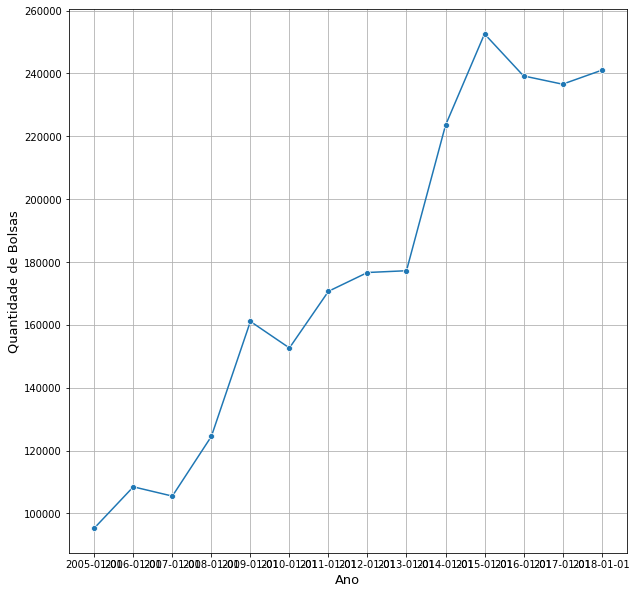

In [113]:
sns.lineplot(
data = qtd_bolsas_ano, marker='o',
x = "ANO_CONCESSAO_BOLSA", 
y = "TIPO_BOLSA")
plt.ylabel('Quantidade de Bolsas', fontsize=13)
plt.xlabel('Ano',fontsize=13)
plt.grid('dark')
# plt.rcParams['figure.figsize']=(10,10)

In [114]:
qtd_bolsas_tipo = comp[['index','ANO_CONCESSAO_BOLSA','TIPO_BOLSA']].groupby(['ANO_CONCESSAO_BOLSA','TIPO_BOLSA'], as_index = False).agg({'index':'count'}).reset_index()
qtd_bolsas_tipo.drop(columns=['level_0'], inplace=True)
qtd_bolsas_tipo.columns = ['ANO_CONCESSAO_BOLSA','TIPO_BOLSA','Total de Bolsas']
qtd_bolsas_tipo

,ANO_CONCESSAO_BOLSA,TIPO_BOLSA,Total de Bolsas
0,2005,BOLSA INTEGRAL,67058
1,2005,BOLSA PARCIAL 50%,28292
2,2006,BOLSA INTEGRAL,85726
3,2006,BOLSA PARCIAL 50%,22754
4,2007,BOLSA INTEGRAL,73530
5,2007,BOLSA PARCIAL 50%,32000
6,2008,BOLSA COMPLEMENTAR 25%,2330
7,2008,BOLSA INTEGRAL,76589
8,2008,BOLSA PARCIAL 50%,45615
9,2009,BOLSA INTEGRAL,113469


Text(18.39895833333334, 0.5, 'Total de Bolsas')

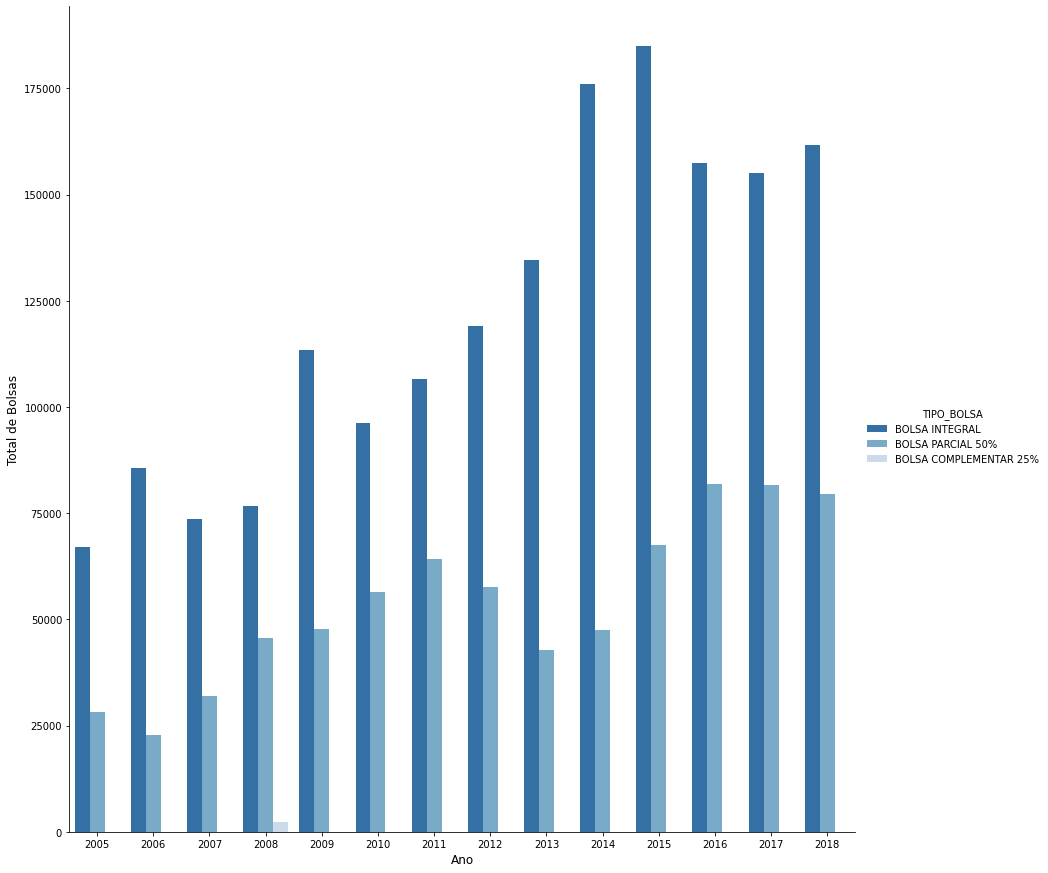

In [115]:
sns.catplot(x="ANO_CONCESSAO_BOLSA", y="Total de Bolsas", kind='bar', hue="TIPO_BOLSA", palette="Blues_r", data=qtd_bolsas_tipo, height=12)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Bolsas', fontsize=12)

In [116]:
modalidade_bolsas_ano = comp[['index','ANO_CONCESSAO_BOLSA','MODALIDADE_ENSINO_BOLSA']].groupby(['ANO_CONCESSAO_BOLSA','MODALIDADE_ENSINO_BOLSA']).agg({'index':'count'}).reset_index()
modalidade_bolsas_ano.columns = ['Ano','Modalidade','Total de Bolsas']
modalidade_bolsas_ano

,Ano,Modalidade,Total de Bolsas
0,2005,EAD,4743
1,2005,Presencial,90607
2,2006,EAD,6235
3,2006,Presencial,102245
4,2007,EAD,11182
5,2007,Presencial,94348
6,2008,EAD,13898
7,2008,Presencial,110636
8,2009,EAD,24773
9,2009,Presencial,136337


Text(0.5, 6.800000000000011, 'Ano')

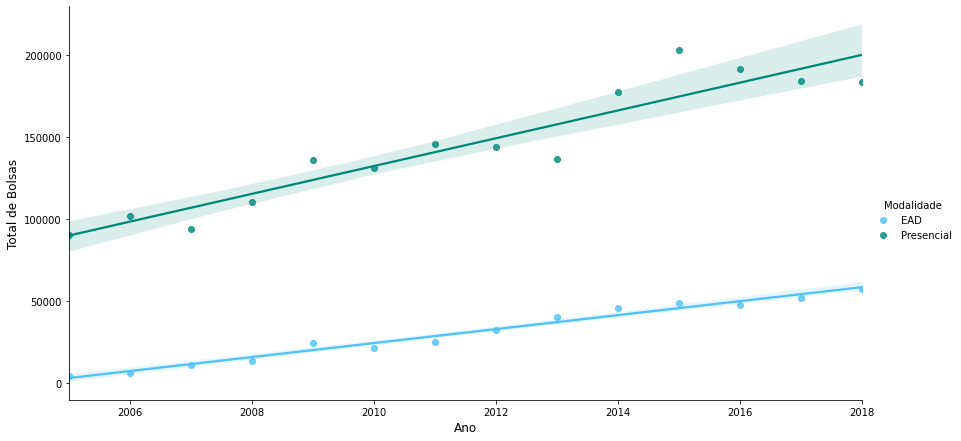

In [117]:
c = ['#4EC2F7','#00877A']
sns.lmplot(x="Ano", y="Total de Bolsas", hue="Modalidade", palette=c, data=modalidade_bolsas_ano, height=6, aspect=2)
plt.ylabel('Total de Bolsas',fontsize=12)
plt.xlabel('Ano',fontsize=12)

In [118]:
qtd_bolsas_turno = comp[['index','ANO_CONCESSAO_BOLSA','NOME_TURNO_CURSO_BOLSA']].groupby(['ANO_CONCESSAO_BOLSA','NOME_TURNO_CURSO_BOLSA']).agg({'index':'count'}).reset_index()
qtd_bolsas_turno.columns = ['ANO_CONCESSAO_BOLSA','MODALIDADE_ENSINO_BOLSA','Total de Bolsas']
qtd_bolsas_turno

,ANO_CONCESSAO_BOLSA,MODALIDADE_ENSINO_BOLSA,Total de Bolsas
0,2005,Curso a distância,4743
1,2005,Integral,3678
2,2005,Matutino,19462
3,2005,Noturno,63041
4,2005,Vespertino,4426
...,...,...,...
65,2018,Curso a distância,57328
66,2018,Integral,6638
67,2018,Matutino,42909
68,2018,Noturno,128715


Text(0.5, 6.799999999999997, 'Ano')

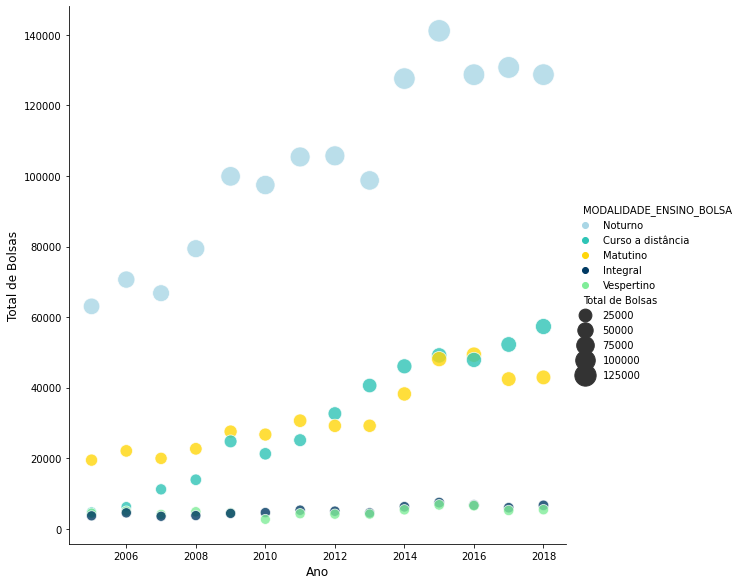

In [119]:
colors = ['#a9d6e5','#2ec4b6','#ffd60a','#013a63', '#80ed99']
sns.relplot(data=qtd_bolsas_turno.sort_values(by=['ANO_CONCESSAO_BOLSA','Total de Bolsas'] , ascending=False),
            x='ANO_CONCESSAO_BOLSA',y='Total de Bolsas',
            hue='MODALIDADE_ENSINO_BOLSA',size="Total de Bolsas",
            alpha=0.8, sizes=(100, 500), height=8, palette=colors)
plt.ylabel('Total de Bolsas', fontsize=12)
plt.xlabel('Ano', fontsize=12)

In [120]:
qtd_raca_anos = comp[['index','ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']].groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']).agg({'index':'count'}).reset_index()
qtd_raca_anos.columns = ['ANO','RACA','TOTAL BOLSAS']
qtd_raca_anos

,ANO,RACA,TOTAL BOLSAS
0,2005,Amarela,2278
1,2005,Branca,34435
2,2005,Indígena,591
3,2005,Não Informada,22578
4,2005,Parda,25658
...,...,...,...
79,2018,Branca,93249
80,2018,Indígena,204
81,2018,Não Informada,22
82,2018,Parda,112141


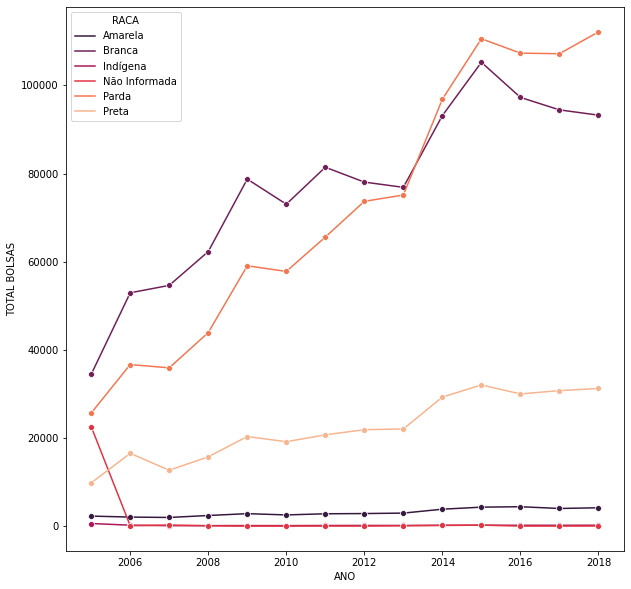

In [121]:
sns.lineplot(x="ANO", y="TOTAL BOLSAS", hue='RACA', marker='o', palette="rocket", data=qtd_raca_anos,sizes=(10, 10))

In [122]:
raca_turno_geral = comp.loc[comp['RACA_BENEFICIARIO_BOLSA'] != 'Não Informada']
raca_turno_geral = raca_turno_geral[['index','RACA_BENEFICIARIO_BOLSA','NOME_TURNO_CURSO_BOLSA' ]].groupby(['RACA_BENEFICIARIO_BOLSA','NOME_TURNO_CURSO_BOLSA'], as_index=False).agg({'index':'count'}).reset_index()
raca_turno_geral.drop(columns='level_0', inplace=True)
raca_turno_geral.columns=['Raça', 'Turno', 'Total']
raca_turno_geral

,Raça,Turno,Total
0,Amarela,Curso a distância,7138
1,Amarela,Integral,1029
2,Amarela,Matutino,8527
3,Amarela,Noturno,25291
4,Amarela,Vespertino,1413
5,Branca,Curso a distância,168030
6,Branca,Integral,38180
7,Branca,Matutino,186048
8,Branca,Noturno,660811
9,Branca,Vespertino,22785


Text(14.449804687499999, 0.5, 'Total de Bolsas')

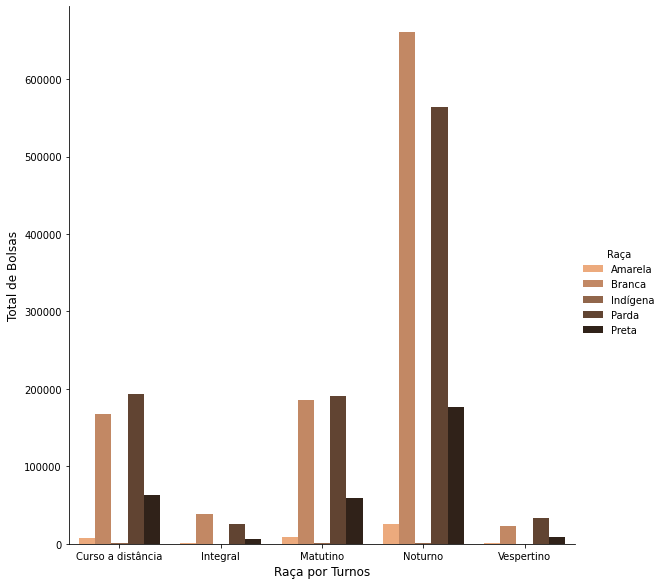

In [123]:
sns.catplot(x="Turno", y="Total", kind='bar', hue="Raça", palette="copper_r", data=raca_turno_geral, height=8)
plt.xlabel('Raça por Turnos', fontsize=12)
plt.ylabel('Total de Bolsas', fontsize=12)

In [124]:
raca_regiao_geral_ano = comp.loc[comp['RACA_BENEFICIARIO_BOLSA'] != 'Não Informada']
raca_regiao_geral_ano = raca_regiao_geral_ano[['index','ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA','REGIAO_BENEFICIARIO_BOLSA' ]].groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA','REGIAO_BENEFICIARIO_BOLSA'], as_index=False).agg({'index':'count'}).reset_index()
raca_regiao_geral_ano.drop(columns='level_0', inplace=True)
raca_regiao_geral_ano.columns = ['Ano','Raça', 'Região', 'Total']
raca_regiao_geral_ano

,Ano,Raça,Região,Total
0,2005,Amarela,CENTRO-OESTE,311
1,2005,Amarela,NORDESTE,413
2,2005,Amarela,NORTE,196
3,2005,Amarela,SUDESTE,1097
4,2005,Amarela,SUL,254
...,...,...,...,...
345,2018,Preta,CENTRO-OESTE,3202
346,2018,Preta,NORDESTE,9165
347,2018,Preta,NORTE,1931
348,2018,Preta,SUDESTE,14558


In [125]:
# sns.catplot(x="Ano", y="Total", kind='bar', hue="Raça", row='Região', palette="copper_r", data=raca_regiao_geral_ano, height=8, ci=None)
# plt.xlabel('Região', fontsize=12)
# plt.ylabel('Total de Bolsas', fontsize=12)

In [126]:
raca_regiao_geral = comp.loc[comp['RACA_BENEFICIARIO_BOLSA'] != 'Não Informada']
raca_regiao_geral = raca_regiao_geral[['index','RACA_BENEFICIARIO_BOLSA','REGIAO_BENEFICIARIO_BOLSA' ]].groupby(['RACA_BENEFICIARIO_BOLSA','REGIAO_BENEFICIARIO_BOLSA'], as_index=False).agg({'index':'count'}).reset_index()
raca_regiao_geral.drop(columns='level_0', inplace=True)
raca_regiao_geral.columns = ['Raça', 'Região', 'Total']
raca_regiao_geral

,Raça,Região,Total
0,Amarela,CENTRO-OESTE,6892
1,Amarela,NORDESTE,9683
2,Amarela,NORTE,3161
3,Amarela,SUDESTE,18853
4,Amarela,SUL,4799
5,Branca,CENTRO-OESTE,66958
6,Branca,NORDESTE,82943
7,Branca,NORTE,23568
8,Branca,SUDESTE,553062
9,Branca,SUL,349163


Text(14.449804687499999, 0.5, 'Total de Bolsas')

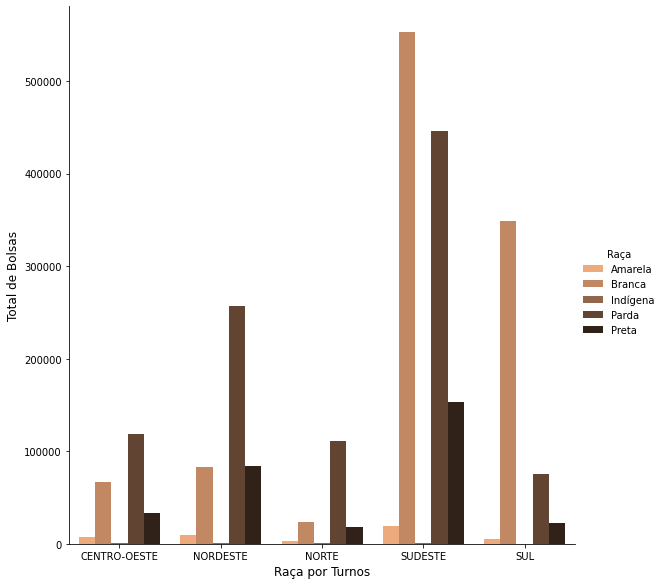

In [127]:
sns.catplot(x="Região", y="Total", kind='bar', hue="Raça", palette="copper_r", data=raca_regiao_geral, height=8)
plt.xlabel('Raça por Turnos', fontsize=12)
plt.ylabel('Total de Bolsas', fontsize=12)

In [128]:
qtd_sexo_anos = comp[['index','ANO_CONCESSAO_BOLSA','SEXO_BENEFICIARIO_BOLSA']].groupby(['ANO_CONCESSAO_BOLSA','SEXO_BENEFICIARIO_BOLSA'], as_index=False).agg({'index':'count'}).reset_index()
qtd_sexo_anos.drop(columns=['level_0'], inplace=True)
qtd_sexo_anos.columns = ['Ano','Sexo','Total']
qtd_sexo_anos

,Ano,Sexo,Total
0,2005,Feminino,59362
1,2005,Masculino,35988
2,2006,Feminino,62455
3,2006,Masculino,46025
4,2007,Feminino,31069
5,2007,Masculino,74461
6,2008,Feminino,37144
7,2008,Masculino,87390
8,2009,Feminino,92349
9,2009,Masculino,68761


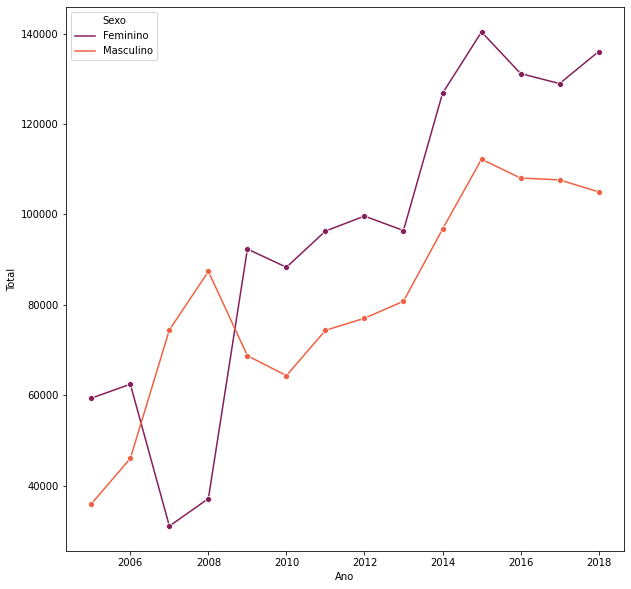

In [129]:
sns.lineplot(x="Ano", y="Total", hue='Sexo', marker='o', palette="rocket", data=qtd_sexo_anos)
plt.rcParams['figure.figsize']=(20,15)

In [130]:
qtd_sexo_uf = (comp[['index','SIGLA_UF_BENEFICIARIO_BOLSA','SEXO_BENEFICIARIO_BOLSA']]
               .groupby(['SIGLA_UF_BENEFICIARIO_BOLSA','SEXO_BENEFICIARIO_BOLSA'],as_index=False)
               .agg({'index':'count'}).reset_index())
qtd_sexo_uf.drop(columns=['level_0'], inplace=True)
qtd_sexo_uf.columns = ['SIGLA_UF_BENEFICIARIO_BOLSA','SEXO_BENEFICIARIO_BOLSA','Total de Bolsas']
qtd_sexo_uf.sort_values(by='Total de Bolsas', ascending=False)

,SIGLA_UF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,Total de Bolsas
50,SP,Feminino,380195
51,SP,Masculino,321379
20,MG,Feminino,162934
21,MG,Masculino,137444
44,RS,Feminino,108485
34,PR,Feminino,95907
45,RS,Masculino,85767
35,PR,Masculino,84870
8,BA,Feminino,75865
36,RJ,Feminino,74445


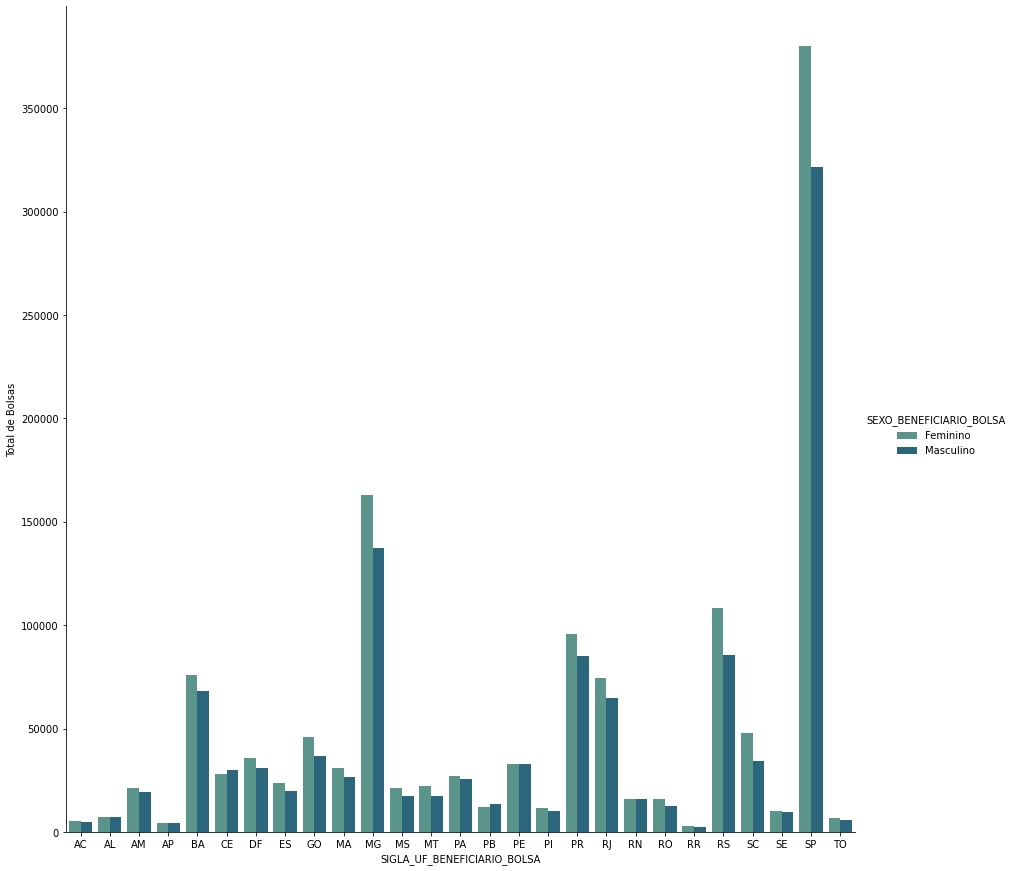

In [131]:
sns.catplot(x="SIGLA_UF_BENEFICIARIO_BOLSA", y="Total de Bolsas", kind='bar', hue="SEXO_BENEFICIARIO_BOLSA", palette="crest",data=qtd_sexo_uf, height=12)

In [132]:
qtd_df_anos = (comp[['index','ANO_CONCESSAO_BOLSA','BENEFICIARIO_DEFICIENTE_FISICO']]
                    .groupby(['ANO_CONCESSAO_BOLSA','BENEFICIARIO_DEFICIENTE_FISICO'], as_index=False)
                    .agg({'index':'count'}).reset_index())
qtd_df_anos.drop(columns=['level_0'], inplace=True)
qtd_df_anos.columns = ['ANO_CONCESSAO_BOLSA','BENEFICIARIO_DEFICIENTE_FISICO','Total de Bolsas']
qtd_df_anos

,ANO_CONCESSAO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO,Total de Bolsas
0,2005,NÃO,94396
1,2005,SIM,954
2,2006,NÃO,107491
3,2006,SIM,989
4,2007,NÃO,105000
5,2007,SIM,530
6,2008,NÃO,123917
7,2008,SIM,617
8,2009,NÃO,160248
9,2009,SIM,862


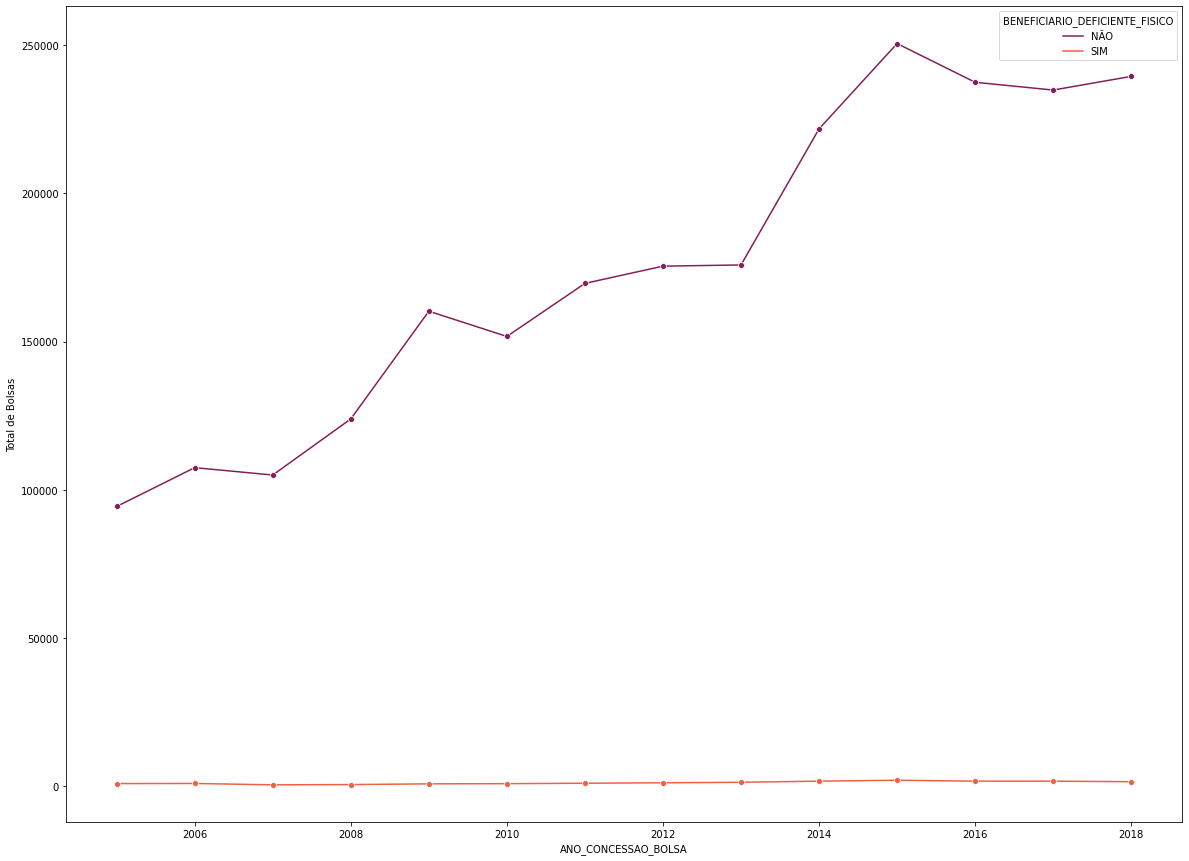

In [133]:
sns.lineplot(x="ANO_CONCESSAO_BOLSA", y="Total de Bolsas", marker='o', hue='BENEFICIARIO_DEFICIENTE_FISICO',  palette="rocket", data=qtd_df_anos)

In [134]:
bolsistas_PDF = comp.query('BENEFICIARIO_DEFICIENTE_FISICO == "SIM"').reset_index()
bolsistas_PDF.drop(columns='level_0', inplace=True)
bolsistas_PDF

,index,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,Idade,Faixa_Etaria,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,63623,2005,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS,BOLSA PARCIAL 50%,Presencial,Administração,Noturno,***115616**,Feminino,Parda,18,16-20,1986-05-15,SIM,SUDESTE,MG,SANTA LUZIA
1,63366,2005,FACULDADE DOIS DE JULHO,BOLSA INTEGRAL,Presencial,Administração,Noturno,***563315**,Masculino,Não Informada,20,16-20,1984-12-01,SIM,NORDESTE,BA,SALVADOR
2,63907,2005,FACULDADE DE SÃO PAULO,BOLSA INTEGRAL,Presencial,Letras - Inglês,Noturno,***262718**,Feminino,Branca,17,16-20,1987-03-31,SIM,SUDESTE,SP,SÃO PAULO
3,64052,2005,INSTITUTO SUPERIOR DE CIÊNCIAS APLICADAS - ISCA,BOLSA PARCIAL 50%,Presencial,Pedagogia,Noturno,***367448**,Feminino,Preta,40,31-40,1964-06-04,SIM,SUDESTE,SP,LIMEIRA
4,64007,2005,INSTITUTO PERNAMBUCANO DE ENSINO SUPERIOR,BOLSA PARCIAL 50%,Presencial,Turismo,Noturno,***513024**,Feminino,Branca,16,16-20,1988-10-22,SIM,NORDESTE,PE,SÃO LOURENÇO DA MATA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17532,2304713,2018,CENTRO UNIVERSITÁRIO DA FUNDAÇÃO HERMINIO OMETTO,BOLSA PARCIAL 50%,Presencial,Sistema De Informação,Noturno,***62451808**,Masculino,Branca,18,16-20,1999-03-20,SIM,SUDESTE,SP,ARARAS
17533,2304988,2018,CENTRO UNIVERSITÁRIO IBMR,BOLSA INTEGRAL,Presencial,Relações Internacionais,Matutino,***16234655**,Feminino,Parda,17,16-20,2000-01-15,SIM,SUDESTE,MG,CAPELINHA
17534,2304344,2018,FACULDADE IBMEC,BOLSA PARCIAL 50%,Presencial,Arquitetura E Urbanismo,Integral,***96361676**,Feminino,Branca,17,16-20,2000-01-14,SIM,SUDESTE,MG,BELO HORIZONTE
17535,2304637,2018,CENTRO UNIVERSITÁRIO DA FUNDAÇÃO HERMINIO OMETTO,BOLSA PARCIAL 50%,Presencial,Sistemas De Informação,Noturno,***62451808**,Masculino,Branca,18,16-20,1999-03-20,SIM,SUDESTE,SP,ARARAS


In [135]:
bolsistas_PDF['NOME_CURSO_BOLSA'].value_counts().head(10)

Administração                 2208
Direito                       2064
Pedagogia                     1276
Ciências Contábeis             814
Serviço Social                 571
Gestão De Recursos Humanos     546
Psicologia                     500
Enfermagem                     420
Educação Física                381
Engenharia Civil               359
Name: NOME_CURSO_BOLSA, dtype: int64

Text(0.5, 1.0, 'Cursos com maiores ingressos de Deficientes físicos')

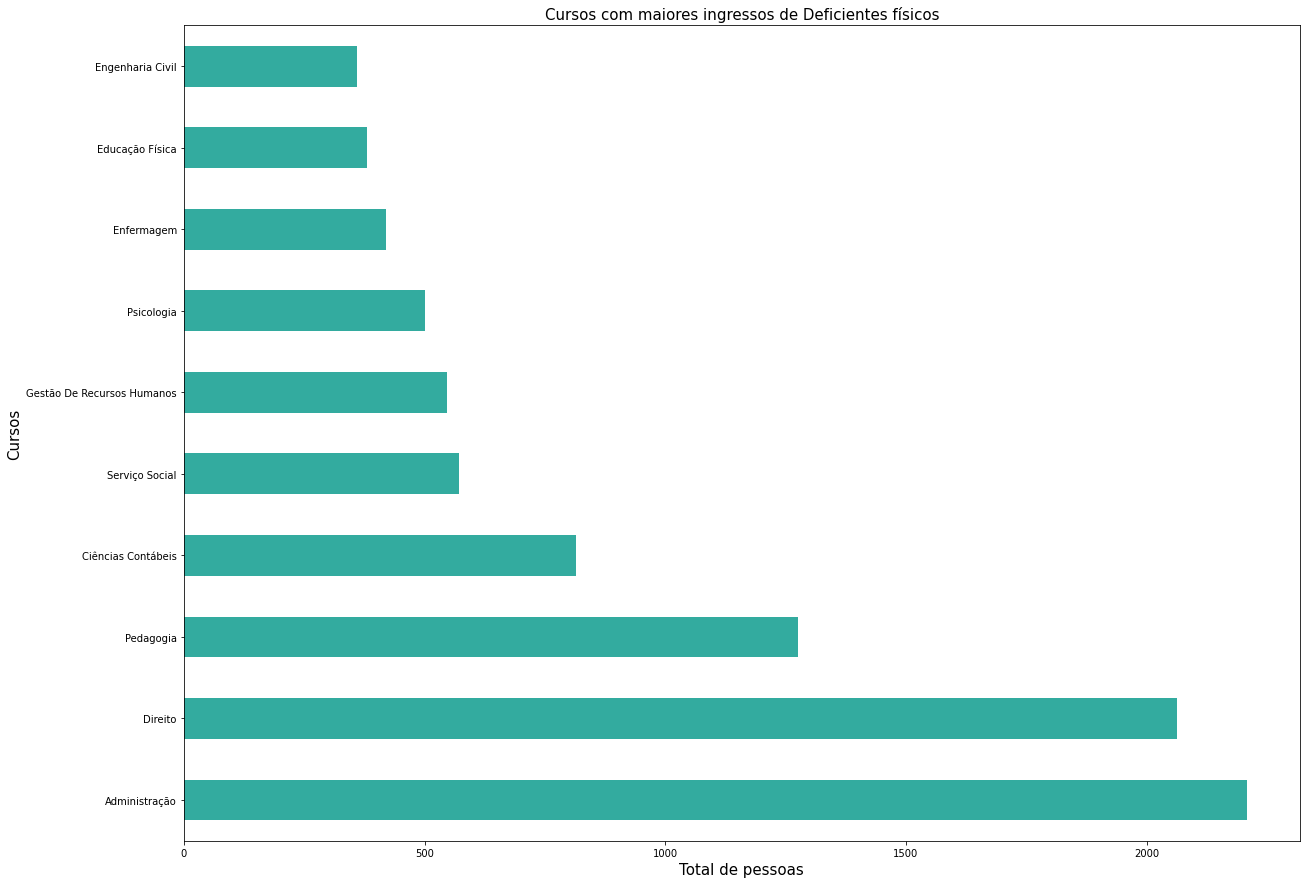

In [136]:
pdf = bolsistas_PDF['NOME_CURSO_BOLSA'].value_counts().sort_values(ascending=False).head(10)
pdf.plot.barh(color="#33AB9F",grid=False)
plt.xlabel("Total de pessoas", fontsize=15)
plt.ylabel("Cursos", fontsize=15)
plt.title("Cursos com maiores ingressos de Deficientes físicos", fontsize=15)

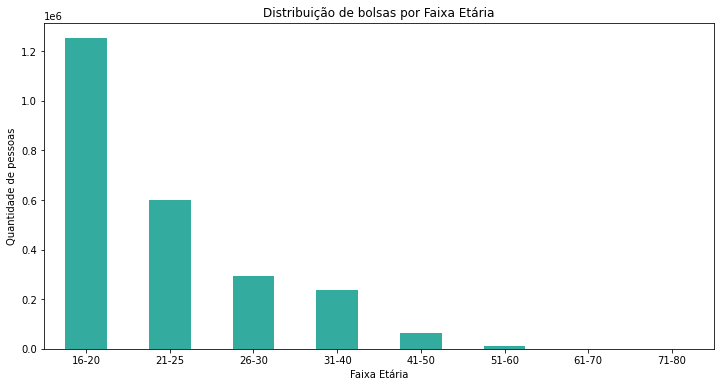

In [137]:
comp['Faixa_Etaria'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color="#33AB9F")
plt.title('Distribuição de bolsas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de pessoas')
plt.show()

([<matplotlib.axis.XTick at 0x7f2868194690>,
 <a list of 61 Text major ticklabel objects>)

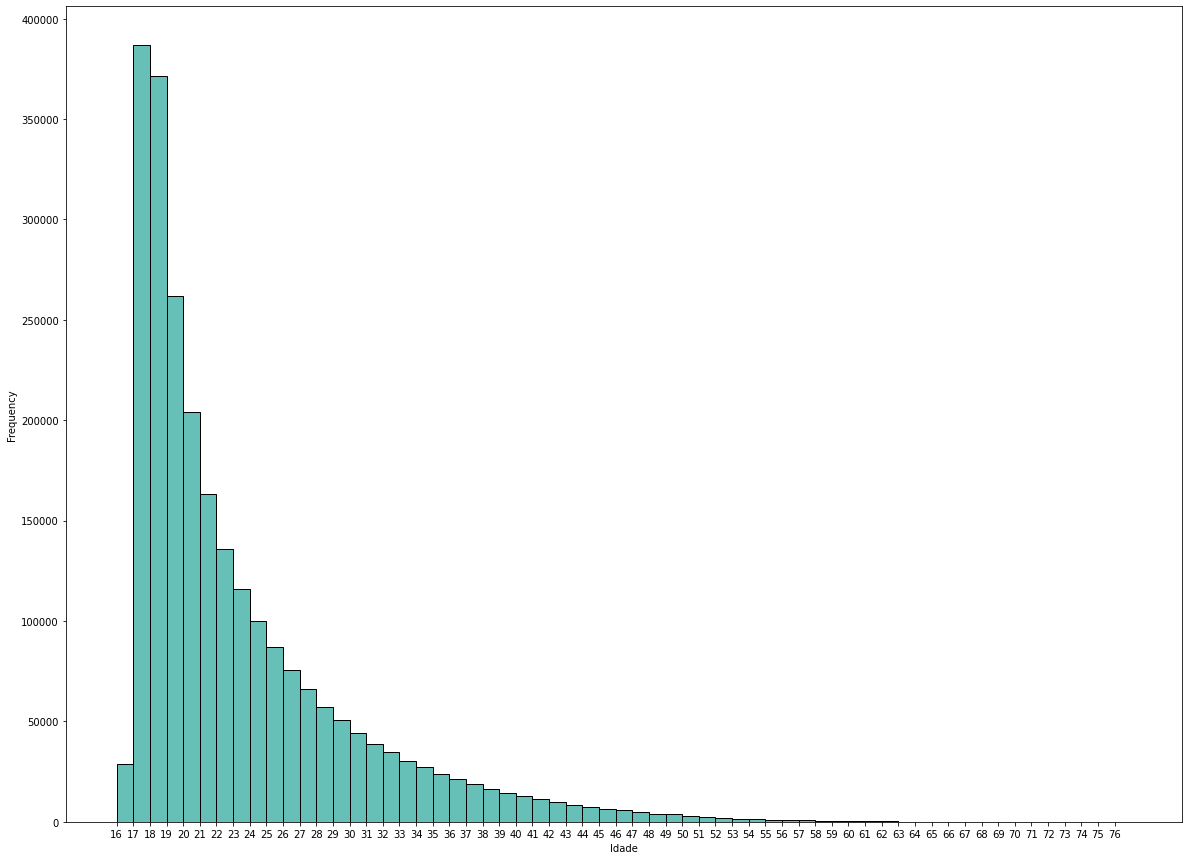

In [138]:
sns.histplot(data=comp, x="Idade",stat="frequency",binwidth=1, color="#33AB9F")
plt.xticks(range(16,77))

#3. Referências

**Prouni 2018**  
  Cursos e notas de corte do PROUNI 2018 - [Brasil.io](https://brasil.io/dataset/cursos-prouni/cursos/)

**Prouni 2005 à 2018**  
  Bolsas concedidas e perfil dos beneficiários do Prouni - [Dados Abertos - MEC](http://dadosabertos.mec.gov.br/prouni)